# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
pip install pandas

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [3]:
X1 = np.array([1, 2, 3])
X2 = np.array([4, 5, 6])
X3 = np.array([7, 8, 9])
X4 = np.array([0, 1, 2])
X = np.array([X1, X2, X3, X4])
print(X)

Y1 = np.array([2, 3, 4])
Y2 = np.array([5, 6, 7])
Y3 = np.array([8, 9, 0])
Y4 = np.array([1, 2, 3])
Y = np.array([Y1, Y2, Y3, Y4])
print(Y)

# 행으로 병합 코드
X_Y = np.concatenate((X,Y),axis=0)
print(X_Y)

# 열로 병합 코드
XY = np.concatenate((X,Y),axis=1)
print(XY)


[[1 2 3]
 [4 5 6]
 [7 8 9]
 [0 1 2]]
[[2 3 4]
 [5 6 7]
 [8 9 0]
 [1 2 3]]
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [0 1 2]
 [2 3 4]
 [5 6 7]
 [8 9 0]
 [1 2 3]]
[[1 2 3 2 3 4]
 [4 5 6 5 6 7]
 [7 8 9 8 9 0]
 [0 1 2 1 2 3]]


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [4]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples): # 선형회귀를 위한 가상 데이터 생성
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # 평균이0 표준편차1인 정규분포에서 난수 추출,num_examples, len(w) 크기의 행렬 x 생성
    y = torch.matmul(X, w) + b # 텐서의 행렬 곱셈하는 함수
    y += torch.normal(0, 0.01, y.shape) # 정규분포에서 난수 추출, 작은 노이즈 추가
    return X, y.reshape((-1, 1)) # y 열벡터로 변형

true_w = torch.tensor([3, -1.5]) # 가상 데이터 생성할 때 사용되는 실제 가중치
true_b = 5.5 # 가상 데이터 생성할 때 사용되는 실제 편향
features, labels = synthetic_data(true_w, true_b, 2000) # 가상 데이터 features, labels로 저장

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2578, -0.1024]) 
label: tensor([4.8793])


torch.tensor : 데이터를 텐서로 받아주는 함수

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices) # index 섞기
    for i in range(0,num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) #순차적으로 인덱스 출력, 데이터셋 끝날때까지
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break # 첫번째 minibatch만 출력

tensor([[ 0.3234,  0.0705],
        [-1.2633,  0.7379],
        [-1.3235,  1.4879],
        [ 1.9717, -0.0545],
        [-0.4638, -0.0550],
        [ 1.6581,  0.1823],
        [ 0.0877, -0.3834],
        [-1.8513,  0.3655],
        [ 1.1017,  0.8784],
        [ 0.1736, -0.4487],
        [-0.0234,  0.2670],
        [ 0.8750, -0.2388],
        [ 0.1272,  0.5908],
        [-0.3264,  0.8580],
        [ 0.8501,  0.3810],
        [-1.4925, -0.4147],
        [ 0.4447,  1.1522],
        [-0.1768,  0.5285],
        [ 0.9310,  1.0051],
        [ 0.0338,  0.1987]]) 
 tensor([[ 6.3555],
        [ 0.5921],
        [-0.7028],
        [11.4962],
        [ 4.1919],
        [10.2173],
        [ 6.3415],
        [-0.6151],
        [ 7.4914],
        [ 6.7009],
        [ 5.0268],
        [ 8.4797],
        [ 4.9923],
        [ 3.2321],
        [ 7.4739],
        [ 1.6532],
        [ 5.1009],
        [ 4.1611],
        [ 6.8027],
        [ 5.2875]])


In [84]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1,0])#원하는 실수를 넣어주세요
print(w,b)

tensor([[-0.0098],
        [-0.0006]], requires_grad=True) tensor([1, 0])


In [11]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w)+b ###lr func 코드 완성하기

In [85]:
def squared_loss(y_hat, y):
    """Squared loss."""
    #return 0.5*np.sum(y_hat-y)**2 ###loss function 직접 짜보기
    #return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
    return torch.mean((y_hat-y)**2)

In [57]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent.""" #확률적 경사 하강법
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          if param.grad != None:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [86]:
lr = 0.01 ###직접 설정
num_epochs = 100 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기
w_list=[]
loss_list=[]

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w_list.append(w.clone().detach().numpy())
        loss_list.append(train_l.item())

#loss가 줄어들지 않

epoch 1, loss 34.166199
epoch 2, loss 32.407162
epoch 3, loss 30.992105
epoch 4, loss 29.856014
epoch 5, loss 28.943161
epoch 6, loss 28.211168
epoch 7, loss 27.617870
epoch 8, loss 27.142889
epoch 9, loss 26.761868
epoch 10, loss 26.453524
epoch 11, loss 26.207403
epoch 12, loss 26.008102
epoch 13, loss 25.849411
epoch 14, loss 25.720224
epoch 15, loss 25.617435
epoch 16, loss 25.534449
epoch 17, loss 25.467535
epoch 18, loss 25.413239
epoch 19, loss 25.369640
epoch 20, loss 25.334696
epoch 21, loss 25.306749
epoch 22, loss 25.284513
epoch 23, loss 25.266195
epoch 24, loss 25.251703
epoch 25, loss 25.240227
epoch 26, loss 25.231121
epoch 27, loss 25.223797
epoch 28, loss 25.217684
epoch 29, loss 25.212891
epoch 30, loss 25.208996
epoch 31, loss 25.205982
epoch 32, loss 25.203453
epoch 33, loss 25.201355
epoch 34, loss 25.199617
epoch 35, loss 25.198305
epoch 36, loss 25.197182
epoch 37, loss 25.196257
epoch 38, loss 25.195566
epoch 39, loss 25.194992
epoch 40, loss 25.194548
epoch 41,

In [59]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0612, -0.1918], grad_fn=<SubBackward0>)
error in estimating b: tensor([4.5000, 3.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

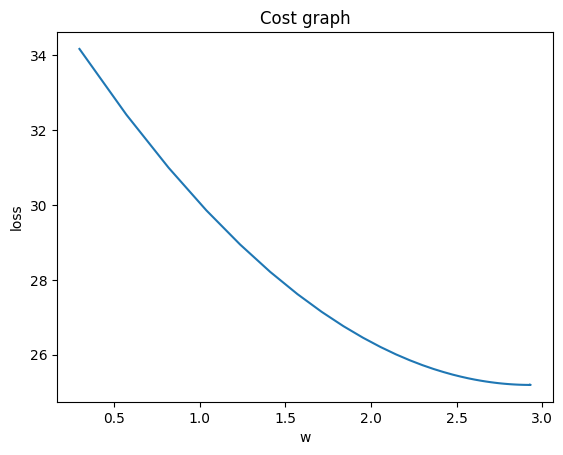

In [87]:
import matplotlib.pyplot as plt

plt.plot([w[0].item() for w in w_list],loss_list)
plt.title('Cost graph')
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5]) # 가중치
true_b = 5.5 # 편향
features, labels = d2l.synthetic_data(true_w, true_b, 2000) # 합성 데이터

In [ ]:
# 합성 데이터 생성 후 미니배치로 다시 나눠줌
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))
# 첫번째 minibatch 가져옴

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1)) #linear layer을 갖는 sequential model 가져옴. 입력특성 2이고 출력 특성 1

In [ ]:
net[0].weight.data.normal_(0, 0.01) # 첫번째 레이어 가중치를 평균 0, 표준편차 0.01인 정규 분포로 초기화
net[0].bias.data.fill_(0) # 첫번째 레이어 bias를 0으로 초기화

In [ ]:
loss = nn.MSELoss() ###api function으로 직접 설정, 손실함수

In [ ]:
trainer = torch.optim.SGD(net.parameters(),0.03)  ###api function으로 직접 설정, 옵티마이저, 0.03=learnig rate

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) # 직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

In [ ]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)